<a href="https://colab.research.google.com/github/ioloi1128/IPCS_1111_modelling/blob/main/1111_IPCS_week1_stefan_Boltzmann_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Week 1: Outgoing Longwave Radiation (OLR), absorbed shortwave radiation (ASR), and equilibrium temperature

created by Yi-Chi Wang

updated: September 21, 2022

Materials are modified from 
https://brian-rose.github.io/ClimateLaboratoryBook/courseware/models-budgets-fun.html

### I. The Stephan-Boltzmann equation and OLR

The Stephan-Boltzmann equation describes the total power emitted from a black body. Here, we can first assume the Earth is a blackbody, the total emitted power (i.e. outgoing longwave radiation; **OLR**) of the Earth can be estimated by the S-B equation by assuming surface temperature ($T_s$) as 15$^{∘}C$ (i.e. 288K) with the following:

$$ \text{OLR} = \sigma T_s^4 $$

where $\sigma$ is the Stephan-Boltzmann constant, $5.67*10^{-8} W m^{-2} K^{-4}$.

##In-class exercise (1.a):
 **What the OLR of the Earth if Earth is a blackbody?**

**Please plot out how the OLR changes with respect to surface temperature.**

(1) import the python librarys

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


(2) set up temperature array and calculate outgoing longwave radiation based on Stefan-Boltzmann equation.

In [ ]:
T = np.linspace(230, 300, 10)
#print(T)

#Stefan-Boltzmann law
sigma = 5.67*pow(10,-8)

#3. Using Python to compute emission to space
OLR = sigma*(T**4)

(3) Plot the relationship between temperature (T) and outgoing longwave radiation (OLR). 

Text(0, 0.5, 'OLR (W/m2)')

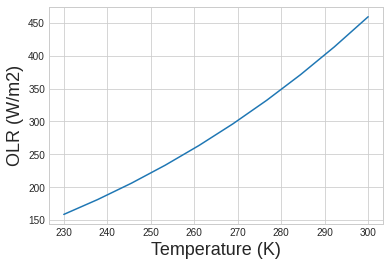

In [ ]:
# Black body: 
# Only a fraction of the surface emission makes it out to space.
fig = plt.figure()
ax = plt.axes()

ax.plot(T, OLR);
plt.xlabel('Temperature (K)', fontsize=18)
plt.ylabel('OLR (W/m2)', fontsize=18)


However, in the real world, because the existence of green house gas, only a fraction of surface emission will be emitted back to the space. Here, we introduce a parameter "transmissity τ" to represent such property. Thus the **OLR** can be represented by:

$$ \text{OLR} = \tau \sigma T_s^4 $$

where $\tau$ is the **transmissivity** of the atmosphere, a number less than 1 that represents the greenhouse effect of Earth's atmosphere.

Then we can try to estimate the transmissity τ over the Earth by using temperature = $15^{∘} C$ and outgoing longwave radiation = 238.5 $W/m^2$.

##In-class exercise (1.b):
 **What the transmissivity of the Earth?**


###code

In [ ]:
# Estimate the fraction parameter tau of the Earth
# T ~ 15C ~ 288K
tau   = 238.5 / sigma / 288**4
print(tau)

0.6114139923687016


###Part II: Absorbed Shortwave Radiation (ASR) and Planetary Albedo

Now it's turn to the shortwave part.

From the observations, the area-averaged incoming solar radiation or insolation is 340 $W/m^2$, and the reflected shortwave radiation is 100 $W/m^2$.

We thus can define the planetary albedo **$α$** as the reflectivity parameter of the Earth.

The **Absorbed Shortwave Radiation** (ASR) is the part of the incoming sunlight that is *not* reflected back to space, i.e. that part that is absorbed somewhere within the Earth system.

Mathematically we write

$$ \text{ASR} = Q - F_{reflected} = (1-\alpha) Q $$

##In-class exercise (2.a):
 **What the albedo of the Earth given the isolation and reflected SW in observations?**

 **Please plot out how the ASR changes with respect to albedo.**

In [ ]:
##Introducing the zero-dimensional Energy Balance Model
#Global mean insolation

Q = 340  # the insolation
Freflected = 100  #  reflected shortwave flux in W/m2
alpha = Freflected / Q
print(alpha)

0.29411764705882354


As the result, we can calculate the absorved shortwave radiation (ASR) based on the fact that it is the residual between incoming solar radiation and reflection. 

In [ ]:
ASRobserved = Q - Freflected
print(ASRobserved)

240


Text(0, 0.5, 'ASR (W/m2)')

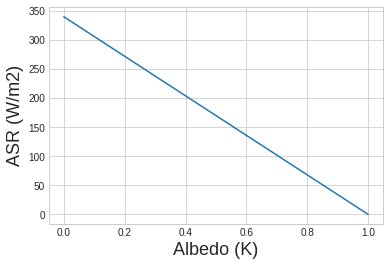

In [ ]:
albedo = np.linspace(0, 1, 10)
ASR_arr= Q*(1-albedo)
# Only a fraction of the surface emission makes it out to space.
fig = plt.figure()
ax = plt.axes()

ax.plot(albedo, ASR_arr);
plt.xlabel('Albedo (K)', fontsize=18)
plt.ylabel('ASR (W/m2)', fontsize=18)

### Part III: Equilibrium temperature

This is one of the central concept of climate modeling.

The Earth system is in energy balance when energy in = energy out, i.e. when

$$ASR = OLR$$

The temperature when the Earth is in energy balance is then defined as the equilibrium temperature.

With our simple greenhouse model, we can get an **exact solution** for the equilibrium temperature.

First, write down our statement of energy balance:

$$ (1-\alpha) Q = \tau \sigma T_s^4 $$


### In-class exercise (3): 

**What's the equilibrium temperature of the Earth given the above ASR and OLR?**

In [ ]:
#  define a reusable function!
def equilibrium_temperature(alpha,Q,tau):
    return ((1-alpha)*Q/(tau*sigma))**(1/4)

Teq_observed = equilibrium_temperature(alpha,Q,tau)
print(Teq_observed)

288.45176609431206


## In-class exercise (4)
1. Given observed albedo, please plot out how the $T_{eq}$ changes with transmissivity.

2. Given observed transmissity, please plot out how the $T_{eq}$ changes with albedo.

In [ ]:
alpha_arr = np.linspace(0, 10, 50)/10.
##print(alpha_arr)

teq_arr = ((1-alpha_arr)*Q/(tau*sigma))**(1/4)

Text(0, 0.5, 'Teq (K)')

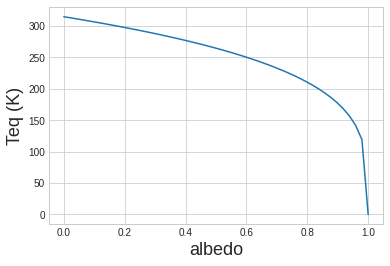

In [ ]:
# T_eq w.r.t. albedo

fig = plt.figure()
ax = plt.axes()

ax.plot(alpha_arr, teq_arr);
plt.xlabel('albedo', fontsize=18)
plt.ylabel('Teq (K)', fontsize=18)

In [ ]:
tau_arr = np.linspace(0.01, 1, 50)
##print(tau_arr)

teq_arr = ((1-alpha)*Q/(tau_arr*sigma))**(1/4)

Text(0, 0.5, 'Teq (K)')

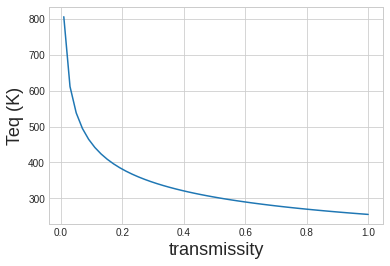

In [ ]:
# T_eq w.r.t. transmissity

fig = plt.figure()
ax = plt.axes()

ax.plot(tau_arr, teq_arr);
plt.xlabel('transmissivity', fontsize=18)
plt.ylabel('Teq (K)', fontsize=18)